# Final Project - S&P500 Price index Prediction

**Submitted by -**: Mahlet Melese

## Introduction

#### The project's domain background
The finance sector is a fascinating field to explore the power of machine learning and its application is well researched and documented. This field is often associated with high monetary compensations which is attractive to many of us to try our hands on applying the knowledge of mathematical and statistical models, and to mine patterns in stock movements so that we can make predictions and have a competitive edge over other traders. Today, there are many trade brokers taking advantage of high-frequency financial data and electronic trading tools that are built on the foundations of machine learning. These high-frequency traders are often characterized by high speed, high turn-over rates and high order-to-trade ratios and are slowly replacing the traditional traders (Aldridge I., 2013). And indicators of buy and sell opportunities are often built on only information of historical price and volume, rather than traditional valuation of a company. Since my current knowledge does not allow myself to carry out meaningful analysis of a company’s value and subsequently perform valuation of its stock, it was found that this method of stock price prediction to be a highly suitable area to study. The data was collected from “Yahoo! Finance”. Datasets of historical data of S&Pstock index price from “Yahoo! Finance” typically has the following structure: Date, Open, High, Low, Close, AdjClose, Volume, Dividends and Stock Splits. However, upon inspection the volume feature was found to be loosely recorded which made this feature particularly unreliable and impractical for analysis. The S&P500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchange in the United States. I will Create Machine learning model to predict tomorrow's S&P500 price index given historical data and back tested this model on twenty plus years of historical data. So, we can really be confident in the prediction that it is making. I have sourced data from 1927 to present which would provide this project a large enough timeframe for meaningful analysis to take place.


#### Data Sources:

The first step is importing the yfinance package, this package calls the yfinance API to download daily stocks index price. Second, we need to initialize the ticker class which enable us to download price history for a single symbol, in this project I will use the 'GSPC' symbol which is the S&P500 index. Then ,we will use history method and we pass in period equals maximum which query data from the very beginning when the index was created and then give us pandas data frame. In this data frame each row is the price on a single trading day so, non-trading days are not included. The data frame columns indicate the opening price when the market opened, the highest price during the day, the lowest price during the day, the close price when the exchange closed, and the total volume traded that day. Essentially, we are going to use these columns to predict if the stock price will go up or down tomorrow. I also have additional columns called Dividends and Stock Splits ; I am not going to use these columns because these columns are more appropriate for individual stocks not for an index price.

#### Methodology 

The workflow of the project goes as follows: I will edit this

Extract and Clean the data from Yahoo Finance Feature Engineering Train with Classification Algorithms Train with Optimized Classification Algorithms with GridSearch using TimeSeriesSplit for cross validation Train with XGBoost Classifier and Optimize with GridSearch using TimeSeriesSplit for cross validation Train with LightGBM Classifier and Optimize with GridSearch using TimeSeriesSplit for cross validation

## Data Preparation & Exploratory Data Analysis (EDA):

### Import Libraries

In [138]:
#Import Dependencies
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report, precision_score,recall_score
import xgboost as xgb

# grid search
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile

from pptx import Presentation 
from pptx.util import Inches
from pptx.util import Pt
import pptx
from pptx.enum.text import PP_ALIGN
from io import StringIO

#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Part 1.Downloading S&P500 price dataset

In [290]:
# Fetch historical data for S&P500 from Yahoo Finance
sp500=yf.Ticker("^GSPC")
sp500= sp500.history(period="max")

#fig.savefig('u7.png') # saving image so we can use in ppt

# Display the Dataset 
sp500.head(10)





C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0


This is the first 10 rows of the dataset using the head method.Here, we can have a first look at the features and some of the values that each one takes.

#### Description for 7 Attribute 
| Columns| Description |
|:------:|-|
| INDEX |  Unique ID | 
| Date | The date of the record | 
| Open | The opening price of the day (when trading starts| 
|High| The highest trade price during the day|
|Low| The lowest trade price during the day|
|Close|The closing price for the day (when trading is finished)|
|Volume| The number of shares traded|

 **Check the dataset shape**

Knowing the amount of data we have is very important, because the quality of our analysis is depend on that.

In [3]:
# check the result
sp500.shape

(24013, 7)

#### Check the datetime index

The index column enable us to index and slice the dataframe easly.

In [4]:
# check the s&p500 index
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-24 00:00:00-04:00', '2023-07-25 00:00:00-04:00',
               '2023-07-26 00:00:00-04:00', '2023-07-27 00:00:00-04:00',
               '2023-07-28 00:00:00-04:00', '2023-07-31 00:00:00-04:00',
               '2023-08-01 00:00:00-04:00', '2023-08-02 00:00:00-04:00',
               '2023-08-03 00:00:00-04:00', '2023-08-04 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24013, freq=None)

 **Check data type of all columns**

Pandas.info method helps us to display the data types of all columns as a series.

In [5]:
# Check the data types
sp500.info() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24013 entries, 1927-12-30 00:00:00-05:00 to 2023-08-04 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24013 non-null  float64
 1   High          24013 non-null  float64
 2   Low           24013 non-null  float64
 3   Close         24013 non-null  float64
 4   Volume        24013 non-null  int64  
 5   Dividends     24013 non-null  float64
 6   Stock Splits  24013 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


####  Let's check if there is a missing value
I checked null values which is a fundamental part of data cleaning.

In [6]:
# recommended code 
sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Sanity check, that there are indeed no null values in the dataset

#### Check duplicate value in the dataframe

In [7]:
# use duplicated function
sp500_dup = sp500.duplicated()

# check the result
sp500_dup.value_counts()

False    20157
True      3856
Name: count, dtype: int64

#### Plot the closing price aginst the index


<AxesSubplot:xlabel='Date'>

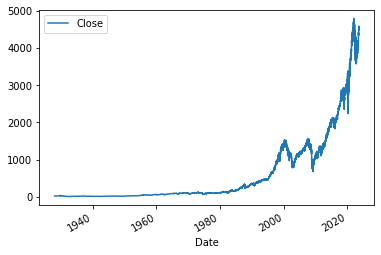

In [8]:
# plot closing price vs index

sp500.plot.line(y="Close",use_index=True)

#fig.savefig('w5.png')


The depicted graph illustrates the historical price movement of the S&P 500 index. Observing this graph, it becomes evident that we might deeply lament our decision to not invest in the index fund at any moment during the recent years.

### Dataset preparation

This data frame contains a significant amount of historical data, which is generally beneficial. However, when dealing with stock market data, an excessive historical range could lead to fundamental shifts in the market, rendering some outdated data irrelevant for future predictions. Therefore, I intend to eliminate all entries before 1990-01-01. Additionally, I will exclude the Dividends and Stock Splits columns from the data frame.

In [291]:
# remove extra columns
del sp500["Dividends"]
del sp500["Stock Splits"]

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [292]:
# remove data before 1990-01-01
# use panda's loc method
# only take rows where the index is at least 1990-01-01
df = sp500.loc["1990-01-01":].copy()

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [293]:
# create column called tomorrow
# the new column going to be tomorrow's price
# use panda's shift method
# use the close column and shift all the price back one day

df["Tomorrow"] = df["Close"].shift(-1)

# show the dataframe
df

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995
...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785


#### Setting up the target for machine learning

The objective is to forecast whether the price will rise or fall tomorrow. Some individuals attempt to predict the exact price, but this approach has a significant flaw. While our model might excel at precisely estimating the price, it can still result in financial losses. This is because our primary concern, when engaging in stock trading, isn't achieving accuracy in the precise price, but rather in accurately determining the direction of movement—whether the price will increase or decrease. Therefore, my aim is to ascertain whether, on days when the stock price rises, we can accurately anticipate this upward trend. This knowledge enables informed stock purchases, centered around predicting whether the stock will ascend or descend.

In [294]:
# set up the target, this is what we are trying to predict using machine learning
# based on tomorrow's price set up the target price
# the target: is tomorrow's price grater than tody's price

df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

# fig.savefig('x6.png')

# show the dataframe
df

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785,0


#### Check duplicates after data preparation

In [13]:
# use duplicated function
sp500_dup = df.duplicated()

# check the result
sp500_dup.value_counts()

False    8463
Name: count, dtype: int64

In [14]:
# Brief Description of our dataset
# fig.savefig('y2.png')

df.describe()



,Open,High,Low,Close,Volume,Tomorrow,Target
count,8463.000000,8463.000000,8463.000000,8463.000000,8.463000e+03,8462.000000,8463.000000
mean,1549.033337,1558.269237,1539.167950,1549.352714,2.442614e+09,1549.493303,0.534326
std,1049.055955,1054.842049,1042.891916,1049.206437,1.852540e+09,1049.188716,0.498850
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991,0.000000
25%,889.734985,898.895020,878.924988,889.984985,6.259850e+08,890.177475,0.000000
50%,1261.890015,1269.880005,1254.180054,1261.890015,2.420510e+09,1261.940002,1.000000
75%,2009.674988,2020.659973,1995.224976,2010.835022,3.823775e+09,2011.052521,1.000000
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,4796.560059,1.000000


#### Distribution of the dataset using histogram

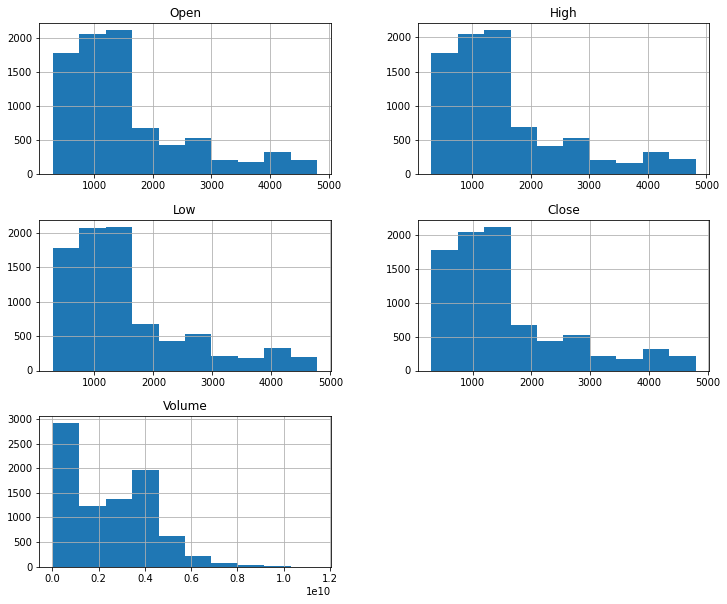

In [15]:
# plot histogram
selected_columns = ['Open','High','Low','Close','Volume']
selected_data = df[selected_columns]
selected_data.hist(figsize=(12,10));
#fig.savefig('j+.png', bbox_inches='tight') # saving image so we can use in ppt

Based on the distribution plot,we need to scale all the numerical values in dataset, before modeling.

#### Boxplot:

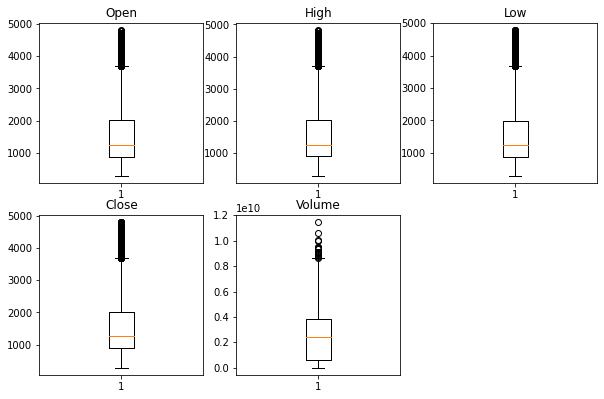

In [16]:
num_column = ['Open', 'High', 'Low', 'Close', 'Volume']

# set figure size
fig = plt.figure(figsize=(10, 10))
i = 1
for f in num_column :
    plt.subplot(3, 3, i)
    plt.boxplot(df[f], whis=1.5) # Increase the size of the box using 'whis' parameter
    plt.title(f)
    i += 1
#fig.savefig('i1.png') # saving image so we can use in ppt
plt.show()

Volume column has outliers that we will need to scale later before model training.

####  Let's look at each column individually

##### Open:

/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open'>

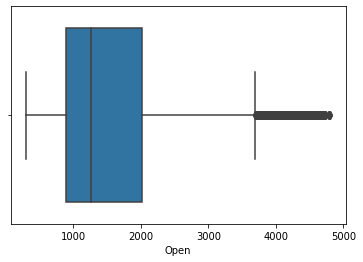

In [17]:
sns.boxplot(df.Open)
#fig.savefig('m1.png') # saving image so we can use in ppt

/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High'>

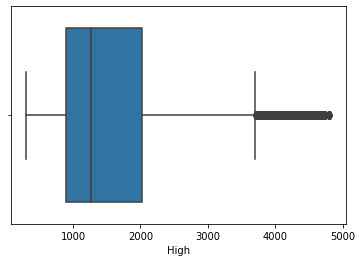

In [18]:
sns.boxplot(df.High)
#fig.savefig('b1.png') # saving image so we can use in ppt

/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low'>

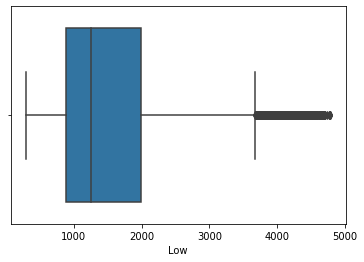

In [19]:
sns.boxplot(df.Low)
#fig.savefig('s1.png') # saving image so we can use in ppt

/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


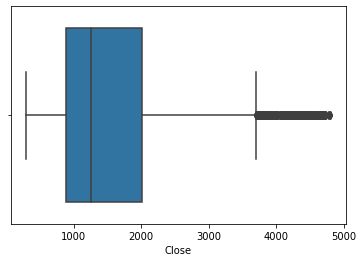

In [20]:
sns.boxplot(df.Close)
fig.savefig('k1.png') # saving image so we can use in ppt

/Users/dm3862/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


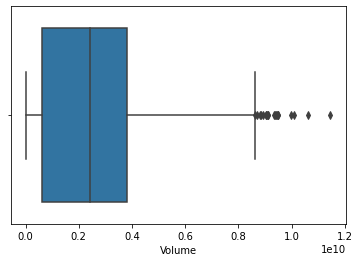

In [21]:
sns.boxplot(df.Volume)
fig.savefig('v1.png') # saving image so we can use in ppt

Volume column shows that there are outliers, and we will need to scale this later in the data preparation before modeling. 

<ipython-input-22-8276ab602138>:8: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency


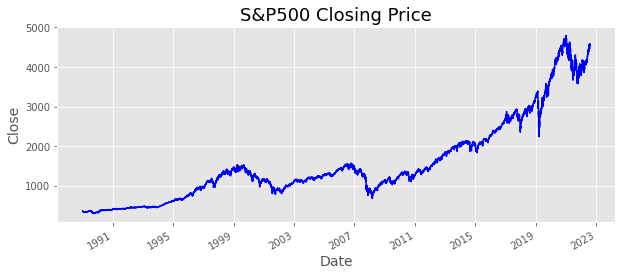

In [22]:
# Plotting close price data
plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.grid(True)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close', fontsize=14)
df['Close'].plot(color='blue')
plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('S&P500 Closing Price', fontsize=18)
fig.savefig('i9.png')
plt.show()

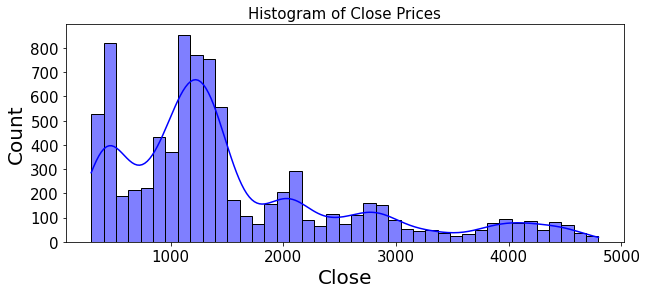

In [8]:
plt.figure(figsize=(10, 4)) 
sns.histplot(df['Close'], kde=True, color='blue')
plt.xlabel('Close', fontsize=20)
plt.xticks(fontsize = 15)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize  = 15)
plt.title('Histogram of Close Prices', fontsize=15)
#fig.savefig('e8.png')
plt.show()

This histogram plot shows the distribution of the 'Close' prices, where the x-axis represents the 'Close' price range and the y-axis represents the frequency (count) of occurrences within each price range.And this plot provides a smooth estimate of the probability density function for the 'Close' prices.And can help us understand the central tendency, spread, and potential outliers in the 'Close' prices distribution.

## Training an initial machine learning model
Now the dataset is ready so let's start train the first machine learning model. For initial model am going to use RandomForestClassifier.I love to use RandomForestClassifier as my default model for most machine earning for a few reasons: one, it works by training a bunch of individual decision trees with randomized parameters and then averaging the results from those decision trees so, because of this process it  resistant  overfitting, they can overfit but it is harder for them to overfit than it is for others models to overfit. They also run relatively quickly, and they can pick up nonlinear tendency in the data. for example, the open price is not linearly corelated with the target, so RandomForest pick up non-linear relationships and  in stock price prediction most of the relationships are non-linear.  

In [295]:
df

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785,0


#### Calculate the null error rate



In [296]:
#Null error rate
NRE = df.Target.value_counts()[1]/(df.Target.value_counts()[0] + df.Target.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.46561909262759926

In [11]:
df.Target.value_counts()

Target
1    4523
0    3941
Name: count, dtype: int64

There are 3941 data points belonging to 0 and 4522 data points belonging to 1.

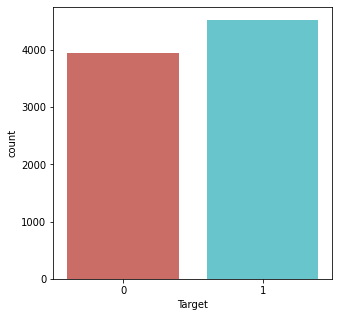

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='Target', data=df, palette='hls')
plt.show()

- Let's  split our data into training and testing, and we are going to scale our data so they are all in the same range using the MinMaxScaler.

In [298]:
# Define the predictor columns and target column
predictors = ["Close","Volume","Open","High","Low"]

#Response and explanatory variables
X = df[predictors]
y = df.Target

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [299]:
#Prepare data for classification process
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

# Initialize the MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
# Fit and transform the training data
X_train = scaler.transform(X_train)
# Transform the test data using the scaler fitted on training data
X_test= scaler.transform(X_test)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [242]:
# Collect all kinds of scores
Accuracy = []
Precision = []
Recall = []
F1_score = []
models = ['Random Forest','Decision Tree','SVM','KNN','Logistic Regression','XG Boost Classifier', 'MLP Classifier','Voting Classifier']

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. RandomForest Classifier

- In this model, a higher number of trees will reduce the variance of the model. n_estimators means the number of trees in the forest, and the default 100 n_estimators does perform well in our model. I try to vary n_estimators based on one of my references on suggestions. When the number of trees is high, it is also better for the model to learn the data, due to the imbalanced nature of the dataset, I set the weight to be balanced. Since higher max_depth may raise the risk of overfitting the training data, I set it to be 16 as some literature suggested.

In [297]:
# now initalize the model
# use n_estimators: the number of decision trees we want to train, the higher the number the better the accuracy
# min_samples_split :help us protect against over-fitting
# set random_state:if we run the same model twice, the random numbers generated will be in a predictble sequence
model_1= RandomForestClassifier(n_estimators = 10,min_samples_split=8,class_weight='balanced',max_depth=8,random_state =42)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [232]:
# let's train the model using the predictor column inorder to predict the target
# use mode.fit method

model_1.fit(X_train, y_train)
model_1.score(X_train, y_train)

#Print metrics
y_train_pred = model_1.predict(X_train)

print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

p = precision_score(y_train, y_train_pred)
f = f1_score(y_train, y_train_pred)
a = accuracy_score(y_train, y_train_pred)
rc=recall_score(y_train, y_train_pred)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.62      0.54      0.58      3154
           1       0.64      0.71      0.67      3617

    accuracy                           0.63      6771
   macro avg       0.63      0.63      0.63      6771
weighted avg       0.63      0.63      0.63      6771

[[1701 1453]
 [1043 2574]]
Precision: 0.6391854978892476
Recall: 0.7116394802322367
F1 score: 0.673469387755102
Accuracy: 0.6313690739920248


#### Let's measure how accurate the model is on the test data

- This holds significant importance within the realm of machine learning. It's crucial for us to evaluate whether our model aligns with our intended outcomes. Specifically, the precision score comes into play. It gauges the accuracy of our predictions when we anticipated the market to rise (designated as 1). Essentially, it quantifies how often our predictions of market growth were accurate. This metric proves particularly effective in this context, given our presumption that we aim to purchase stocks and retain them until their value appreciates before selling. Therefore, it's imperative that the stock price ascends upon purchase. Depending on our objectives, we can modify the choice of error metrics to assess performance. For this project, I will be employing precision, accuracy, and the F1 score for evaluation.

#### Model Prediction and Evalution

In [263]:
# generate prediction using the model with predict method
y_preds = model_1.predict(X_test)

print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

p = precision_score(y_test,y_preds)
f = f1_score(y_test,y_preds)
a = accuracy_score(y_test,y_preds)
rc=recall_score(y_test,y_preds)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
Accuracy.append(100* accuracy_score(y_test,y_preds))
Precision.append(100* precision_score(y_test,y_preds,average='weighted'))
Recall.append(100* recall_score(y_test,y_preds,average='weighted'))
F1_score.append(100* f1_score(y_test,y_preds,average='weighted'))

              precision    recall  f1-score   support

           0       0.48      0.45      0.47       787
           1       0.55      0.58      0.57       906

    accuracy                           0.52      1693
   macro avg       0.52      0.52      0.52      1693
weighted avg       0.52      0.52      0.52      1693

[[353 434]
 [378 528]]
Precision: 0.5488565488565489
Recall: 0.5827814569536424
F1 score: 0.5653104925053534
Accuracy: 0.5203780271707029


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


When we said the stock price go up, it only went up by 55% of the time.

 ### 2.  DecisionTree Classifier
- max_depth: the maximum depth of the tree
- min_samples_split: the minimum number of samples required to split an internal node

In [234]:
# train the model
model_2 =DecisionTreeClassifier(max_depth=12, min_samples_split=20)
model_2.fit(X_train, y_train)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=12, min_samples_split=20)

In [235]:
model_2.score(X_train, y_train)

#Print metrics
y_train_pred_1 = model_2.predict(X_train)

print(classification_report(y_train, y_train_pred_1))
print(confusion_matrix(y_train, y_train_pred_1))

p = precision_score(y_train, y_train_pred_1)
f = f1_score(y_train, y_train_pred_1)
a = accuracy_score(y_train, y_train_pred_1)
rc=recall_score(y_train, y_train_pred_1)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.64      0.30      0.41      3154
           1       0.58      0.86      0.69      3617

    accuracy                           0.60      6771
   macro avg       0.61      0.58      0.55      6771
weighted avg       0.61      0.60      0.56      6771

[[ 935 2219]
 [ 521 3096]]
Precision: 0.5825023518344309
Recall: 0.8559579762233895
F1 score: 0.6932377966860725
Accuracy: 0.5953330379559888


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here, using max depth of 12 for model 2, a test accuracy of 60% is achieved. Class 1 got F1 score which is 69% while Class 0 got an F1 score of 40.

#### Model Prediction and Evalution

In [262]:
# generate prediction using the model with predict method
y_preds_1 = model_2.predict(X_test)

print(classification_report(y_test,y_preds_1))
print(confusion_matrix(y_test,y_preds_1))

p = precision_score(y_test,y_preds_1)
f = f1_score(y_test,y_preds_1)
a = accuracy_score(y_test,y_preds_1)
rc=recall_score(y_test,y_preds_1)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
Accuracy.append(100* accuracy_score(y_test,y_preds_1))
Precision.append(100* precision_score(y_test,y_preds_1,average='weighted'))
Recall.append(100* recall_score(y_test,y_preds_1,average='weighted'))
F1_score.append(100* f1_score(y_test,y_preds_1,average='weighted'))

              precision    recall  f1-score   support

           0       0.46      0.22      0.30       787
           1       0.53      0.78      0.63       906

    accuracy                           0.52      1693
   macro avg       0.50      0.50      0.47      1693
weighted avg       0.50      0.52      0.48      1693

[[174 613]
 [203 703]]
Precision: 0.53419452887538
Recall: 0.7759381898454746
F1 score: 0.6327632763276327
Accuracy: 0.5180153573538098


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


When we said the stock price go up, it only went up by 53% of the time.

### 3. SVM model


- Due to the SVM's reliance on selecting a hyperplane for classification, we recognized that a more adaptable configuration would enhance the algorithm's classification capabilities. As anticipated, the linear kernel exhibited the poorest performance. We sequentially experimented with kernels such as sigmoid and rbf before trying the polynomial kernel. Notably, logistic functions are a subset of sigmoid functions, leading to a comparable performance between logistic regression and the sigmoid kernel. Our exploration of kernels ultimately led us to settle on the polynomial function.

- The incorporation of the probability parameter stemmed from our efforts to debug ensemble models. This was essential for voting classifiers, as they necessitate class probability estimation from all classifiers involved, a feature not inherently present in the default settings of SVC. Modifying the default settings was imperative to ensure the proper functioning of the ensemble model. However, this adjustment introduced a drawback: the SVC class now employs cross-validation to estimate class probabilities, resulting in slower training times and the addition of a predict_proba() method.

In [237]:
#Create a svm Classifier
#svm = SVC(kernel='sigmoid', probability = True)
#svm = SVC(kernel='rbf', probability = True)
svm = SVC(kernel='poly', probability = True)
svm.fit(X_train,y_train)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVC(kernel='poly', probability=True)

In [238]:
# train the model
svm.score(X_train, y_train)

#Print metrics
svm_preds = svm.predict(X_train)

print(classification_report(y_train,svm_preds))
print(confusion_matrix(y_train, svm_preds))

p = precision_score(y_train, svm_preds)
f = f1_score(y_train, svm_preds)
a = accuracy_score(y_train, svm_preds)
rc=recall_score(y_train, svm_preds)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3154
           1       0.53      1.00      0.70      3617

    accuracy                           0.53      6771
   macro avg       0.27      0.50      0.35      6771
weighted avg       0.29      0.53      0.37      6771

[[   0 3154]
 [   0 3617]]
Precision: 0.5341899276325506
Recall: 1.0
F1 score: 0.69638043896804
Accuracy: 0.5341899276325506


C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machines (SVM) is known for being relatively robust to outliers compared to some other machine learning algorithms.  Here we I get a better result and it fits my expectations.

#### Model Prediction and Evalution

In [261]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
y_preds_svm= svm.predict(X_test)

print(classification_report(y_test,y_preds_svm))
print(confusion_matrix(y_test,y_preds_svm))

p = precision_score(y_test,y_preds_svm)
f = f1_score(y_test,y_preds_svm)
a = accuracy_score(y_test,y_preds_svm)
rc=recall_score(y_test,y_preds_svm)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
Accuracy.append(100* accuracy_score(y_test,y_preds_svm))
Precision.append(100* precision_score(y_test,y_preds_svm,average='weighted'))
Recall.append(100* recall_score(y_test,y_preds_svm,average='weighted'))
F1_score.append(100* f1_score(y_test,y_preds_svm,average='weighted'))

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       787
           1       0.54      1.00      0.70       906

    accuracy                           0.54      1693
   macro avg       0.27      0.50      0.35      1693
weighted avg       0.29      0.54      0.37      1693

[[  0 787]
 [  0 906]]
Precision: 0.5351447135262847
Recall: 1.0
F1 score: 0.697191227395152
Accuracy: 0.5351447135262847


C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


When we predicted an increase in the stock price, it occurred only 54% of the time.

### 5.KNN

- Because KNN necessitates the choice of parameter K, it's worth noting that opting for a smaller value of K increases the impact of noise on the outcome, whereas a larger value leads to higher computational costs. To initiate the process, we select K=3 and progressively explore alternative K values, typically converging around the square root of the sample size (n) for our models. The advantage of this algorithm's computational efficiency enables us to employ grid search directly for optimal parameter determination.

In [174]:
#defining grids
#train sample size
n_neighbor = [3,5,10,13,19,29, 45, 78, 99]

# create and fit  model, testing each parameters
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=dict(n_neighbors=n_neighbor))
knn_grid.fit(X_train, y_train)
print(knn_grid)
# summarize the results of the grid search
print('Best Score: ',knn_grid.best_score_)
print('Best parameters: ',knn_grid.best_params_)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 13, 19, 29, 45, 78, 99]})
Best Score:  0.5269531850414515
Best parameters:  {'n_neighbors': 13}


- Based on testing, the accuracy of the model decreases since a large K value may reduce overfit. On the other hand, it raised the risk of overfitting. Although the best k selected by grid search is when k=5, we still determine to use k=10. Because this gave a relatively balanced result. What's more, it reduced the risk of making the model too sensitive.

In [175]:
#set k=3
# try knn = KNeighborsClassifier(n_neighbors=5)
# try knn = KNeighborsClassifier(n_neighbors=99)
#set the best K from Gid search

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier(n_neighbors=10)

In [218]:
# train the model
knn.score(X_train, y_train)

#Print metrics
y_knn_preds = knn.predict(X_train)

print(classification_report(y_train, y_knn_preds))
print(confusion_matrix(y_train, y_knn_preds))

p = precision_score(y_train, y_knn_preds)
f = f1_score(y_train, y_knn_preds)
a = metrics.accuracy_score(y_train, y_knn_preds)
rc=recall_score(y_train, y_knn_preds)


print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.60      0.69      0.64      3154
           1       0.69      0.59      0.64      3617

    accuracy                           0.64      6771
   macro avg       0.64      0.64      0.64      6771
weighted avg       0.64      0.64      0.64      6771

[[2170  984]
 [1471 2146]]
Precision: 0.6856230031948882
Recall: 0.593309372408073
F1 score: 0.6361345783311101
Accuracy: 0.6374243095554571


#### Model Prediction and Evalution

In [260]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_knn= knn.predict(X_test)

print(classification_report(y_test,preds_knn))
print(confusion_matrix(y_test,preds_knn))

p = precision_score(y_test,preds_knn)
f = f1_score(y_test,preds_knn)
a = accuracy_score(y_test,preds_knn)
rc=recall_score(y_test,preds_knn)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
Accuracy.append(100* accuracy_score(y_test,preds_knn))
Precision.append(100* precision_score(y_test,preds_knn,average='weighted'))
Recall.append(100* recall_score(y_test,preds_knn,average='weighted'))
F1_score.append(100* f1_score(y_test,preds_knn,average='weighted'))

              precision    recall  f1-score   support

           0       0.47      0.55      0.50       787
           1       0.54      0.46      0.49       906

    accuracy                           0.50      1693
   macro avg       0.50      0.50      0.50      1693
weighted avg       0.50      0.50      0.50      1693

[[430 357]
 [493 413]]
Precision: 0.5363636363636364
Recall: 0.45584988962472406
F1 score: 0.4928400954653938
Accuracy: 0.49793266391021856


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Support Vector Machines (SVMs) exhibit stronger resilience to outliers compared to k-Nearest Neighbors (KNN).In this specific case, I observed improved outcomes that align with my initial expectations.

## 6. Logistic Regression

In [178]:
#Start with default setting for logistic regression
model_log = LogisticRegression(solver='saga', max_iter=1000)
#train the algorithm
model_log.fit(X_train, y_train)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(max_iter=1000, solver='saga')

In [219]:
# train the model
model_log.score(X_train, y_train)

#Print metrics
y_log_preds = model_log.predict(X_train)

print(classification_report(y_train,y_log_preds))
print(confusion_matrix(y_train, y_log_preds))

p = precision_score(y_train, y_log_preds)
f = f1_score(y_train, y_log_preds)
a = metrics.accuracy_score(y_train, y_log_preds)
rc=recall_score(y_train, y_log_preds)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3154
           1       0.53      1.00      0.70      3617

    accuracy                           0.53      6771
   macro avg       0.27      0.50      0.35      6771
weighted avg       0.29      0.53      0.37      6771

[[   0 3154]
 [   0 3617]]
Precision: 0.5341899276325506
Recall: 1.0
F1 score: 0.69638043896804
Accuracy: 0.5341899276325506


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

#### Model Prediction and Evalution

In [259]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_log= model_log.predict(X_test)

print(classification_report(y_test,preds_log))
print(confusion_matrix(y_test,preds_log))

p = precision_score(y_test,preds_log)
f = f1_score(y_test,preds_log)
a = accuracy_score(y_test,preds_log)
rc=recall_score(y_test,preds_log)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
Accuracy.append(100* accuracy_score(y_test,preds_log))
Precision.append(100* precision_score(y_test,preds_log,average='weighted'))
Recall.append(100* recall_score(y_test,preds_log,average='weighted'))
F1_score.append(100* f1_score(y_test,preds_log,average='weighted'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       787
           1       0.54      1.00      0.70       906

    accuracy                           0.54      1693
   macro avg       0.27      0.50      0.35      1693
weighted avg       0.29      0.54      0.37      1693

[[  0 787]
 [  0 906]]
Precision: 0.5351447135262847
Recall: 1.0
F1 score: 0.697191227395152
Accuracy: 0.5351447135262847


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

Up to this point, our most effective model has been the SVM and Logistic Regression model, when compared to Random Forest, Decision Tree and KNN. Let's assess the performance of the remaining models.

### 4. XG BOOST

XGBoost harnesses the strengths of both random forest and gradient boosting, resulting in a prediction error that is typically lower than that of boosting or random forest alone. When fine-tuning XGBoost hyperparameters, my primary focus is on adjusting the early_stopping_rounds value. Moreover, the default learning rate of 0.1 has proven effective in this scenario.

In [181]:
# define the model
xgb_clf = xgb.XGBClassifier(weighted='balanced',random_state=42)

#Vary the stopping value for checking difference of parameters.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=15, eval_set=[(X_test, y_test)])


[19:00:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "weighted" } are not used.

[0]	validation_0-logloss:0.69118
[1]	validation_0-logloss:0.69208
[2]	validation_0-logloss:0.69248
[3]	validation_0-logloss:0.69285
[4]	validation_0-logloss:0.69363
[5]	validation_0-logloss:0.69436
[6]	validation_0-logloss:0.69503
[7]	validation_0-logloss:0.69604
[8]	validation_0-logloss:0.69697
[9]	validation_0-logloss:0.69726
[10]	validation_0-logloss:0.69813
[11]	validation_0-logloss:0.69813
[12]	validation_0-logloss:0.69866
[13]	validation_0-logloss:0.69845
[14]	validation_0-logloss:0.69896


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\suraf\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [220]:
xgb_clf.score(X_train, y_train)

#Print metrics
y_preds_xgb = xgb_clf.predict(X_train)

print(classification_report(y_train, y_preds_xgb))
print(confusion_matrix(y_train, y_preds_xgb))

p = precision_score(y_train, y_preds_xgb)
f = f1_score(y_train, y_preds_xgb)
a = metrics.accuracy_score(y_train, y_preds_xgb)
rc=recall_score(y_train, y_preds_xgb)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.59      0.19      0.29      3154
           1       0.56      0.88      0.68      3617

    accuracy                           0.56      6771
   macro avg       0.57      0.54      0.49      6771
weighted avg       0.57      0.56      0.50      6771

[[ 606 2548]
 [ 425 3192]]
Precision: 0.5560975609756098
Recall: 0.8824993088194636
F1 score: 0.6822699583199744
Accuracy: 0.5609215773150199


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Model Prediction and Evalution

In [258]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_xgb= xgb_clf.predict(X_test)

print(classification_report(y_test,preds_xgb))
print(confusion_matrix(y_test,preds_xgb))

p = precision_score(y_test,preds_xgb)
f = f1_score(y_test,preds_xgb)
a = accuracy_score(y_test,preds_xgb)
rc=recall_score(y_test,preds_xgb)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
Accuracy.append(100* accuracy_score(y_test,preds_xgb))
Precision.append(100* precision_score(y_test,preds_xgb,average='weighted'))
Recall.append(100* recall_score(y_test,preds_xgb,average='weighted'))
F1_score.append(100* f1_score(y_test,preds_xgb,average='weighted'))

              precision    recall  f1-score   support

           0       0.50      0.17      0.26       787
           1       0.54      0.85      0.66       906

    accuracy                           0.54      1693
   macro avg       0.52      0.51      0.46      1693
weighted avg       0.52      0.54      0.47      1693

[[135 652]
 [135 771]]
Precision: 0.5418130709768095
Recall: 0.8509933774834437
F1 score: 0.6620867325032204
Accuracy: 0.5351447135262847


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The results demonstrated that it outperforms Random Forest,DecisionTree and KNN across nearly all metrics, while also requiring less time for computation.

#### Feature importance with XGBoost.

- Feature importance with XGBoost. One of the many benefits of using XGBoost is that it can automatically provide estimates of feature importance from a trained
predictive model.

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


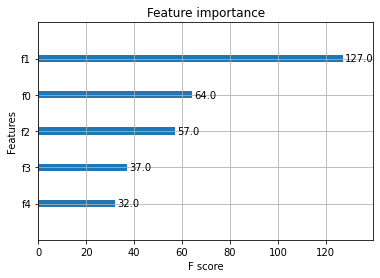

In [98]:
# calculates the importance of each feature in the training data
xgb.plot_importance(xgb_clf)
plt.show()


### 8. Ensemble Model

The ensemble approach involves assembling four individual models into an array known as 'estimators,' which serves as the foundation for constructing a voting classifier. This voting classifier takes a pair of inputs: the first input being the array of estimators that encompasses our four models. The fundamental principle behind a voting ensemble is to aggregate predictions generated by classification models through summation or by averaging predictions from regression models. Additionally, it provides us with the flexibility to adjust parameters for the SVM model.

In the initial phase, I configured the voting parameter to 'hard,' guiding the classifier to make straightforward predictions. However, through thorough research, I came to realize that utilizing 'soft' voting often yields superior performance compared to hard voting. This is attributed to the heightened significance placed on highly confident votes. The key distinction lies in the approach: 'soft' voting involves summing the predicted probabilities for each label. To simplify, while 'hard' voting predicts the majority label, 'soft' voting predicts the label associated with the highest predicted probability.

Upon implementing 'soft' voting for the model, I observed a modest enhancement in its performance.

With the refined ensemble model in place, I will proceed to train it using the training data and subsequently evaluate its performance on the testing data.

In [187]:
#create a dictionary of our models
estimators=[('Random Forest', model_1),('Regression Model', model_log), ('SVM', svm), (' DecisionTree', model_2)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
#fit model to training data
ensemble.fit(X_train, y_train)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=8,
                                                     min_samples_split=8,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('Regression Model',
                              LogisticRegression(max_iter=1000, solver='saga')),
                             ('SVM', SVC(kernel='poly', probability=True)),
                             (' DecisionTree',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_split=20))],
                 voting='soft')

In [223]:
ensemble.score(X_train, y_train)

#Print metrics
ensemble_preds = ensemble.predict(X_train)

print(classification_report(y_train, ensemble_preds))
print(confusion_matrix(y_train, ensemble_preds))

p = precision_score(y_train,ensemble_preds)
f = f1_score(y_train, ensemble_preds)
a = accuracy_score(y_train, ensemble_preds)
rc=recall_score(y_train, ensemble_preds)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.79      0.22      0.35      3154
           1       0.58      0.95      0.72      3617

    accuracy                           0.61      6771
   macro avg       0.69      0.59      0.53      6771
weighted avg       0.68      0.61      0.55      6771

[[ 699 2455]
 [ 186 3431]]
Precision: 0.5829085966700646
Recall: 0.9485761680951065
F1 score: 0.7220877617594443
Accuracy: 0.6099542165115935


#### Model Prediction and Evalution

In [253]:
# generate prediction using the model with predict method
# calculate prediction using the actuall target and the predicted target
#Print metrics
preds_ensemble= ensemble.predict(X_test)

print(classification_report(y_test, preds_ensemble))
print(confusion_matrix(y_test, preds_ensemble))

p = precision_score(y_test, preds_ensemble)
f = f1_score(y_test, preds_ensemble)
a = accuracy_score(y_test, preds_ensemble)
rc=recall_score(y_test, preds_ensemble)

print("Precision:", p)
print("Recall:",rc)
print("F1 score:", f) 
print("Accuracy:", a)
Accuracy.append(100* accuracy_score(y_test, preds_ensemble))
Precision.append(100* precision_score(y_test, preds_ensemble,average='weighted'))
Recall.append(100* recall_score(y_test, preds_ensemble,average='weighted'))
F1_score.append(100* f1_score(y_test, preds_ensemble,average='weighted'))

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.46      0.13      0.21       787
           1       0.53      0.86      0.66       906

    accuracy                           0.53      1693
   macro avg       0.50      0.50      0.43      1693
weighted avg       0.50      0.53      0.45      1693

[[106 681]
 [123 783]]
Precision: 0.5348360655737705
Recall: 0.8642384105960265
F1 score: 0.660759493670886
Accuracy: 0.5251033668044891


According to this outcome, our ensemble model demonstrates relatively comparable performance when contrasted with the others.

### Model Selection

In [254]:
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy(%)': Accuracy,
    'Precision(%)': Precision,
    'Recall(%)': Recall,
    'F1-score(%)': F1_score
})

# Sort the DataFrame based on a specific metric (e.g., Accuracy)
sorted_metrics_df = metrics_df.sort_values(by='Precision(%)', ascending=False)

print(sorted_metrics_df)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: All arrays must be of the same length

In [255]:
compare = pd.DataFrame({'Algorithms' : models , 'Accuracy(%)':Accuracy, 'Precision(%)':Precision,'Recall(%)':Recall, 'F1-score(%)':F1_score})
compare.sort_values(by='Precision(%)' ,ascending=False)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: All arrays must be of the same length

In [256]:
compare

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'compare' is not defined

In [257]:
compare.sort_values(by='Precision(%)' ,ascending=False)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'compare' is not defined

#### Building a back testing system
My subsequent objective involves establishing a more robust testing methodology for the algorithms, enabling us to accurately gauge its performance over extended time periods. Presently, our testing has been limited to 20 percent of the data. However, as we aspire to create a comprehensive stock price model for real-world application, it becomes imperative to evaluate the algorithms across multiple years of historical data, thereby assessing its adaptability to diverse scenarios and bolstering our confidence for future deployment.

To facilitate this, I will undertake a backtesting approach. I'll employ data from the initial 10 years to generate predictions for the subsequent year and I will use one the model which is Random Forest. This process will be iteratively repeated, progressively predicting values for successive years. Such an approach provides predictions across a multitude of years, enhancing our model's reliability and bolstering our confidence in its efficacy.

Post backtesting, my focus will shift towards evaluating the accuracy of my predictions.


In [300]:
# create a prediction function

def predict(train,test,predictors,model_1):
    model_1.fit(train[predictors],train["Target"])
    preds=model_1.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Backtest to check how good our model is:

In [301]:
# create backtest function
# train the model with 10 year's of data
# we will be training a model for about a year then going to the next year
# each dataframe is a prediction for a single year
# loop the data year by year

def backtest(df,model_1,predictors,start=2500,step=250):
    all_predictions =[]
    
    for i in range(start,df.shape[0],step):
        train=df.iloc[0:i].copy()
        test=df.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model_1)
        all_predictions.append(predictions)
    return pd.concat(all_predictions) # concat all the predictions together

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [302]:
# start the backtest
predictions=backtest(df,model_1,predictors)  

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [303]:
# see how many day's we predicted the market go up vs down
# use value_count: count how many times each type of predictions was made

prediction_counts = predictions["predictions"].value_counts()

# Print the counts
print(prediction_counts)

predictions
0    3487
1    2477
Name: count, dtype: int64


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can see, we predicted the market go down about 3487 days and go up about 2477 days.

In [305]:
# now let's check the precision score
precision_score(predictions["Target"],predictions["predictions"])

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5224061364553896

Across all of those rows, about six thousend traiding days,we were about 52% precise. When we say the market would go up, it went up 52% of the time.

In [306]:
# check the percentage of days where the market actually went up
# use value count of the target divided by the number of rows total
predictions["Target"].value_counts()/predictions.shape[0]

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Target
1    0.534038
0    0.465962
Name: count, dtype: float64

So, the S&P500 in the days we were looking at actually went up 53.4% of days and went down 46.6% of days.

#### Adding additional predictors to the model
-
In order to enhance the model's accuracy, let's incorporate additional features. My approach involves varying the prediction horizons for the algorithm and examining the rolling means. This entails calculating the mean closing price for specific time spans, such as the last 2 days, the last trading week, the past 60 days, the last year, and even the last four years. Subsequently, we will establish the ratio between today's closing price and the closing price during these designated periods. The inclusion of an extended rolling period might prove particularly advantageous for the learning process.

For this endeavor, I will solely employ the Random Forest model.

In [307]:
# create varity of rolling averages

horizons = [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons: # loop through horizons
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column]=df["Close"]/rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column]=df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors +=[ratio_column,trend_column]

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [308]:
df.head(5)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe has NaN values because when pandas can not find enough days or rows prior to the current row, it actually compute the rolling average and return NaN.

In [309]:
# remove the missing values in the dataframe
df_new= df.dropna()
df_new.head(5)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


In [310]:
#Null error rate
NRE = df_new.Target.value_counts()[1]/(df_new.Target.value_counts()[0] + df_new.Target.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.4625485729599357

#### Improving the model

In [279]:
# update the model slightly and change some of the parameters
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [311]:
# rewrite the predict function slightly
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors]) [:,1]
    preds[preds >=.6] = 1 # this will reduce the number of trading days
    preds[preds < .6]= 0
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [312]:
# run the backtest again
predictions=backtest(df_new,model,new_predictors)

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [313]:
# check the value count again
predictions["predictions"].value_counts()

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


predictions
0.0    4144
1.0     819
Name: count, dtype: int64

There were about four thousend days where it pridicted the price went down. The distribution is very different now, we can see that only a few days we predict that the price would go up that is because I change the trashhold, I ask the model to be more confident in its prediction before it actually predicted and the price go up.Which means we are actully be trading or buying stock in fewer days.

In [315]:
precision_score(predictions["Target"],predictions["predictions"])


C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.568986568986569

## Summary and next steps with the model
Upon analysis, we observe that the  model with the new features exhibits a 57% precision in predicting an upward movement in stock prices when purchases are made. This achievement is notably commendable, particularly considering the scope of using time-series data and historical index prices exclusively. Notably, neural networks were excluded from consideration in this project due to their computational demands. Specifically, recurrent neural networks like Long-Short Term Memory (LSTM) networks, tailored for time-series data, were not explored due to these constraints.

Additionally, time limitations prevented the exploration of alternative methods of feature engineering, such as incorporating classic stock market indicators like Bollinger Bands and Sharpe Ratios. To enhance the model, it is recommended to integrate exchanges operating overnight. While the S&P 500 trades only during US market hours, other global indices commence trading before the US market opens. Exploring correlations between these indices and the S&P 500 could potentially yield valuable insights.

In conclusion, this marks the culmination of the first phase of the project. The forthcoming second stage will delve into exploring the aforementioned avenues for improvement. It is crucial to acknowledge, however, that predicting financial markets, including stock prices like the S&P 500, is a formidable and intricate undertaking. Financial markets are influenced by an extensive array of variables, encompassing economic indicators, geopolitical occurrences, investor sentiments, and other unpredictable elements. Thus, consistently achieving high-accuracy stock price predictions remains a challenging endeavor.

## Powerpoint Presentation using Python

In [319]:
# Create powerpoint presentation
path = "sample.pptx"
#Intitalizing PPt object 
prs = Presentation() 

# creating slide 1 
zero_slide = prs.slide_layouts[6]
slide0 = prs.slides.add_slide(zero_slide)
 
txBox = slide0.shapes.add_textbox( pptx.util.Inches(3.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(1))
tf = txBox.text_frame
tf.clear()
p = tf.paragraphs[0]
run = p.add_run()
run.text = 'SP500 Data Analysis'
font = run.font
font.name = 'Calibri'
font.size = Pt(24)
font.bold = True
font.italic = None 
p.alignment = PP_ALIGN.CENTER


# creating slide 2 
blank_slide_layout = prs.slide_layouts[6] 
slide = prs.slides.add_slide(blank_slide_layout)
left = top = Inches(1)
pic = slide.shapes.add_picture('j1.png', pptx.util.Inches(0.25), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 3
second_slide = prs.slide_layouts[6]
slide2 = prs.slides.add_slide(second_slide)
 
pic = slide2.shapes.add_picture('x6.png', pptx.util.Inches(1.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(7), height=pptx.util.Inches(2))

pic = slide2.shapes.add_picture('y2.png', pptx.util.Inches(0.5), pptx.util.Inches(3.5),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(3))

# creating slide 3
third_slide = prs.slide_layouts[6]
slide3 = prs.slides.add_slide(third_slide)

pic = slide3.shapes.add_picture('j+.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(6))

# creating slide 4
forth_slide = prs.slide_layouts[6]
slide4 = prs.slides.add_slide(forth_slide)

pic = slide4.shapes.add_picture('i1.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 5
fifth_slide = prs.slide_layouts[6]
slide5 = prs.slides.add_slide(fifth_slide)

pic = slide5.shapes.add_picture('i9.png', pptx.util.Inches(1), pptx.util.Inches(0.5),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(2))
# creating slide 6
sixth_slide = prs.slide_layouts[6]
slide6 = prs.slides.add_slide(sixth_slide)
pic = slide6.shapes.add_picture('e8.png', pptx.util.Inches(0.5), pptx.util.Inches(3),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(4))

#saving the created slide 
prs.save('S&P500 stock.pptx')

C:\Users\suraf\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: 'j1.png'

## Reference 
https://www.researchgate.net/figure/High-Frequency-Trading-Domain-source-Aldridge-2013_fig1_358123608
https://www.kaggle.com/code/samaxtech/predicting-s-p500-index-linearreg-randomforests  for linear regression and random forest
https://medium.com/@akashsangar2653/eda-and-price-prediction-of-s-p-500-stock-prices-dataset-290535b9a40b
https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
https://www.kaggle.com/code/yash16jr/s-p500-data-eda-and-prediction-arima-sarimax
https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests   for financial data
https://ai.plainenglish.io/using-deep-learning-to-predict-stock-prices-a-step-by-step-guide-with-python-and-the-s-p-500-59b06de25357
https://medium.com/codex/stocks-news-sentiment-analysis-with-deep-learning-transformers-and-machine-learning-cdcdb827fc06 for sentiment
